<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/Southern_Africa_Production_and_Import_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries 
import pylab
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [19]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_df = pd.read_csv(data_path, encoding ='latin-1', sep=',')
general_df

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Total Food Aid,Total Food Aid per capita (kg/cap/year),Region
0,Afghanistan,1980,NaN,3933.805000,17.100,0.0,0.000000,0.0000,14.186,NaN,NaN,17.100000,0.0000,277.301917,1.205414,0.000000,278.507331,NaN,NaN,Central and East Asia
1,Afghanistan,1981,NaN,3763.130000,96.500,0.0,0.000000,0.0000,13.984,NaN,NaN,96.500000,0.0000,269.102546,6.900744,0.000000,276.003289,NaN,NaN,Central and East Asia
2,Afghanistan,1982,NaN,3602.788000,74.900,0.0,0.000000,0.0000,13.673,NaN,NaN,74.900000,0.0000,263.496526,5.477949,0.000000,268.974475,NaN,NaN,Central and East Asia
3,Afghanistan,1983,NaN,3474.450000,79.503,0.0,0.000000,0.0000,13.300,NaN,NaN,79.503000,0.0000,261.236842,5.977669,0.000000,267.214511,NaN,NaN,Central and East Asia
4,Afghanistan,1984,NaN,3306.778000,21.150,0.0,0.000000,0.0000,12.932,NaN,NaN,21.150000,0.0000,255.705073,1.635478,0.000000,257.340551,NaN,NaN,Central and East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,Zimbabwe,2009,141.317483,1677.731196,576.300,0.0,2.163975,0.0144,12.474,69.115038,217.997711,578.463975,0.0144,134.498252,46.373575,0.001154,180.870673,287.112748,23.016895,Southern Africa
2580,Zimbabwe,2010,136.990970,1723.572567,368.600,0.0,2.163975,0.0144,12.571,34.650952,63.648974,370.763975,0.0144,137.107037,29.493594,0.001145,166.599486,98.299925,7.819579,Southern Africa
2581,Zimbabwe,2011,139.933312,1765.470308,640.000,0.0,2.163975,0.0144,12.754,24.445836,32.984747,642.163975,0.0144,138.424832,50.350006,0.001129,188.773709,57.430583,4.502947,Southern Africa
2582,Zimbabwe,2012,142.318797,1255.897663,620.000,0.0,2.163975,0.0144,13.014,16.082141,26.456731,622.163975,0.0144,96.503586,47.807283,0.001107,144.309762,42.538873,3.268701,Southern Africa


In [24]:
#scatter plots 
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr


Zimbabwe
-0.15799954084885107
260.2243253164798
0.5321872248977042
Zambia
-0.1766660191530511
222.05990751610184
0.35718169837644276
Swaziland
-0.9937307401379604
208.6898575812641
0.45152029225103724
Namibia
-0.2221765145989555
135.964295298919
0.3273459835325609
Mozambique
0.05434291071400081
147.2297224171596
0.07903927173623827
Malawi
-0.1678217448470762
262.14503891913586
0.12302504309316496
Madagascar
-0.13500887561067806
242.6992189595675
0.2982361562665201
Lesotho
-0.3854287732858155
162.93413239403475
0.3124351644093745


,Import Quantity (Grains & Ce.)(1000MT),Production Quantity per capita (kg/cap/year)
Import Quantity (Grains & Ce.)(1000MT),1.000000,-0.558959
Production Quantity per capita (kg/cap/year),-0.558959,1.000000


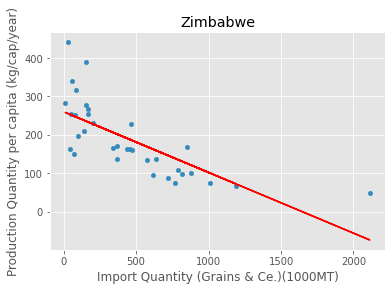

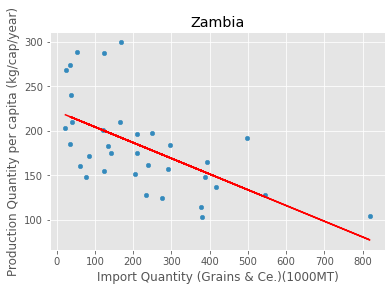

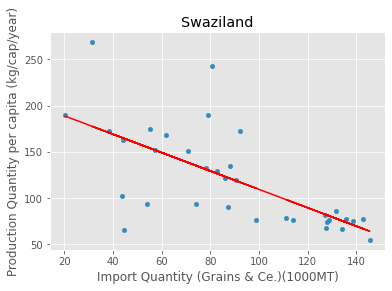

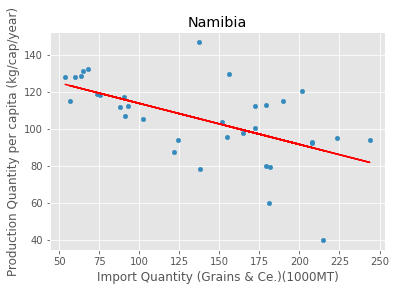

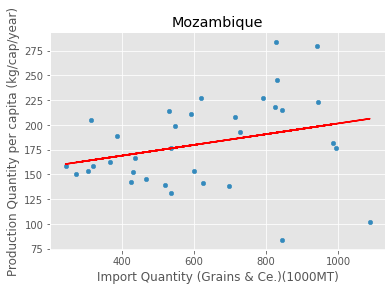

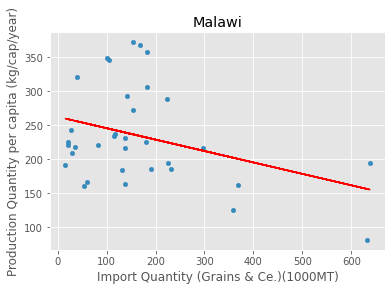

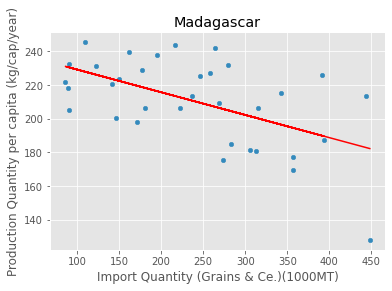

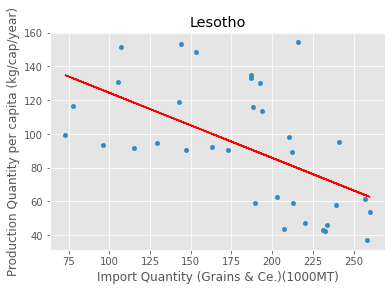

In [27]:
#calling the function for every country in Southern Africa - food production and import quantity
plot_country('Zimbabwe','Import Quantity (Grains & Ce.)(1000MT)','Production Quantity per capita (kg/cap/year)')
plot_country('Zambia','Import Quantity (Grains & Ce.)(1000MT)','Production Quantity per capita (kg/cap/year)')
plot_country('Swaziland','Import Quantity (Grains & Ce.)(1000MT)','Production Quantity per capita (kg/cap/year)')
plot_country('Namibia','Import Quantity (Grains & Ce.)(1000MT)','Production Quantity per capita (kg/cap/year)')
plot_country('Mozambique','Import Quantity (Grains & Ce.)(1000MT)','Production Quantity per capita (kg/cap/year)')
plot_country('Malawi','Import Quantity (Grains & Ce.)(1000MT)','Production Quantity per capita (kg/cap/year)')
plot_country('Madagascar','Import Quantity (Grains & Ce.)(1000MT)','Production Quantity per capita (kg/cap/year)')
plot_country('Lesotho','Import Quantity (Grains & Ce.)(1000MT)','Production Quantity per capita (kg/cap/year)')

In [28]:
#corelation coefficient - production and import 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Import Quantity (Grains & Ce.)(1000MT)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)                                      1.000000                               -0.729512
Import Quantity (Grains & Ce.)(1000MT)                                           -0.729512                                1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)                                      1.000000                               -0.597647
Import Quantity (Grains & Ce.)(1000MT)                                           -0.597647                                1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)             